# Review and Introduction to Neural Networks

These are my notes from Patrick Wall's excellent [scientific writing seminar](https://github.com/ubcs3/2017-Winter) held at UBC, Vancouver.

We'll be following closely the book [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/) by Michael Nielsen.  

### 1. Review simple machine learning scenarios with scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The most basic example is that of linear regression, which is usually implemented by means of the [least squares](https://en.wikipedia.org/wiki/Least_squares) approach

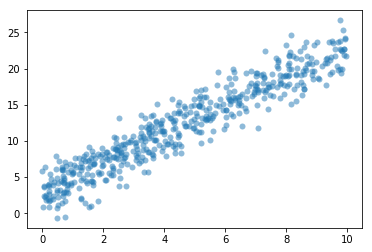

In [2]:
N = 500
# generate uniformly distributed data with rand
X = 10*np.random.rand(N,1)
# randn is the normal distribution, which we'll use as noise 
y = 2*X + 3 + 2*np.random.randn(N,1)
plt.scatter(X,y, lw=0, alpha=0.5)
# recall that lw modifies line width and alpha is the opacity

Having generated our fake data set, we'll import the necessary module:

In [3]:
from sklearn.linear_model import LinearRegression as LR 
# LR is an instance of a 'class' object!

In [4]:
reg = LR()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LR has two main parameters to the fit object:


In [5]:
reg.coef_

array([[ 2.01355041]])

In [6]:
reg.intercept_

array([ 2.97498548])

We are now in a good position to test the model that we've just built.

In [7]:
X_test = np.linspace(0,10,100).reshape(100,1)
# We have to reshape .: sklearn always expects 2-dimensional arrays as inputs,
# 1 -> N samples, 2 -> features
y_test = reg.predict(X_test)

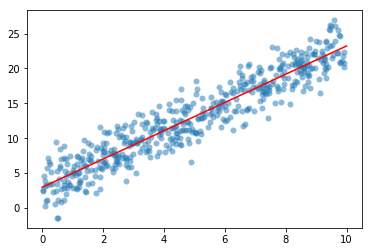

In [14]:
plt.scatter(X,y,lw=0,alpha=0.5)
plt.plot(X_test, y_test, 'r')

Hooray, our model works! This is assigned a value by the score attribute

In [90]:
reg.score(X,y)

0.8987710997981071

### 2. Clustering

Having done something incredibly basic, we're going to move on to a really neat demonstration of what sklearn is capable of doing. In the following, we're going to import a colored image and determine the distribution of colors in it. This is to be achieved by means of the KMeansClustering algorithm.

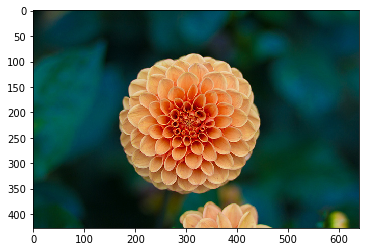

In [5]:
from sklearn.datasets import load_sample_image
img = load_sample_image('flower.jpg')
plt.imshow(img)

As one can see, python thinks this is an array:

In [9]:
type(img)

numpy.ndarray

In [10]:
img.shape

(427, 640, 3)

The first two values correspond to the pixel coordinates, whereas the last three value will be an RGB triple for the color value at that cell:

In [11]:
img[200,300,:]

array([104,   0,  13], dtype=uint8)

In [12]:
img[426,639,0], img[426,639,1], img[426,639,2]

(9, 43, 27)

In [13]:
img[426,639,:]

array([ 9, 43, 27], dtype=uint8)

To proceed, we'll need to turn the data type into floats. If the original is not converted to floats, some numpy functions will output the negative of the original color scheme.

In [6]:
img_as_floats = np.array(img,dtype=np.float64)/255

In [7]:
h,w,d = img_as_floats.shape
color_data = img_as_floats.reshape(h*w,d)

In the above, we've turned the image into a 2d array to allow analysis with sklearn. Remember that sklearn always expects 2d arrays as inputs!

In [16]:
color_data.shape

(273280, 3)

In [2]:
color_data[:5] # [:5] shows the first five rows!

NameError: name 'color_data' is not defined

We'll proceed by using the [KMeans algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Each point represents an RGB value from a cloud of points. [KMeans](https://en.wikipedia.org/wiki/K-means_clustering) aims to partition $n$ observations into $k$ clsuters with the nearest mean serving as the prototype of the cluster. This is not to be confused with the k-nearest neighbor classifier!

In [14]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=64)

In order to save computational time, we'll cluster a random sample of colors first to get an accurate representation of the whole picture while saving computational time.

In [18]:
from sklearn.utils import shuffle
random_colors = shuffle(color_data)[:2000]
clf.fit(random_colors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=64, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In the above, we have obtained 64 colors representing the distribution of colors in the image. We shall now use these fit results to reproduce a new image. 

First, replace every color in the image with the nearest cluster center.

In [147]:
kmeans_colors = clf.predict(color_data)

But the colors are now assinged the index of the cluster center

In [148]:
kmeans_colors[:5]

array([50, 50, 57, 57, 57], dtype=int32)

In order to translate these back into an RGB triple, we first need to gather the cluster centers

In [149]:
colors = clf.cluster_centers_

In [150]:
colors[:5]

array([[ 0.67030812,  0.49887955,  0.37703081],
       [ 0.0197549 ,  0.17642157,  0.1370098 ],
       [ 0.00218703,  0.25935143,  0.31131222],
       [ 0.885895  ,  0.62934851,  0.42327641],
       [ 0.80339869,  0.25333333,  0.01620915]])

We then translate the kmeans_colors into their triple using a [list comprehension](http://stackoverflow.com/questions/11479392/what-does-a-for-loop-within-a-list-do-in-python) for loop

In [151]:
new_image = np.array([colors[kmeans_colors[i]] for i in range(0,len(kmeans_colors))]).reshape(h,w,d)

In summary: we took an image and obtained a list of colors from it. We then found the cluster centers best representing the collection. We then made a new picture replacing every pixel color with the color from the collection that best approximates it.


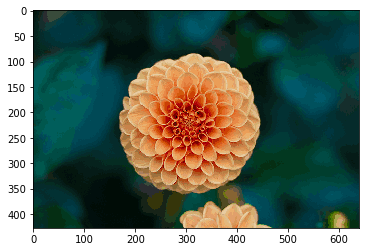

In [152]:
plt.imshow(new_image)

The amazing thing is that both images look essentially indistinguishable to the human eye:

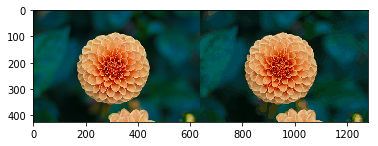

In [154]:
img_compare = np.concatenate((img_as_floats,new_image), axis=1) 
plt.imshow(img_compare)

In [185]:
cluster_numbers = [KMeans(n_clusters=i).fit(random_colors) for i in [2,4,8,16,32,64]]

In [187]:
prediction_numbers = list(map(lambda x:x.predict(color_data),cluster_numbers)) 
center_numbers = list(map(lambda x:x.cluster_centers_,cluster_numbers)) 
# used map and anonymous function lambda to pass the method to every list element!

In [210]:
images = [np.array([center_numbers[j][prediction_numbers[j][i]] for i in range(0,len(kmeans_colors))]).reshape(h,w,d) for j in  range(0,len(cluster_numbers))]

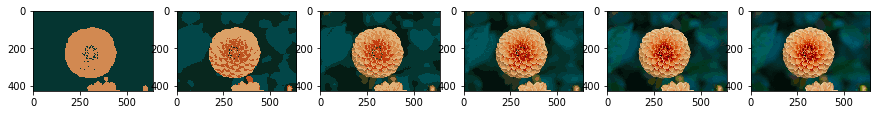

In [228]:
plt.figure(figsize=(15,5))
plt.subplot(1,6,1)
plt.imshow(images[0])
plt.subplot(1,6,2)
plt.imshow(images[1]);
plt.subplot(1,6,3)
plt.imshow(images[2]);
plt.subplot(1,6,4)
plt.imshow(images[3]);
plt.subplot(1,6,5)
plt.imshow(images[4]);
plt.subplot(1,6,6)
plt.imshow(images[5]);

### 3. Dimensionality Reduction

We know that each color is a vector in $\mathbb{R}^3$. In order to examine the collection of colors in the image, we will use principal component analysis to project the 3-dimensional RBG tuple to 2D

In [2]:
from sklearn.decomposition import PCA

In [3]:
#Instantiate the model
pca = PCA(n_components=2)

In [8]:
# Find the 2D plane in the data which captures the variation in the colors
pca.fit(color_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
# Project all the colors in the image to 2D
colors_2D = pca.transform(color_data)

In [20]:
# Project all the cluster centers to 2D
clusters_2D = pca.transform(clf.cluster_centers_)

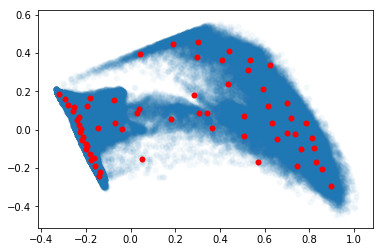

In [21]:
plt.scatter(colors_2D[:,0],colors_2D[:,1],alpha=0.05,lw=0);
plt.scatter(clusters_2D[:,0],clusters_2D[:,1],c='red',lw=0);

What this scatter plot successfully tells us is the way in which the cluster centers are successfully distributed among the $mathbb{R}^2$ projection of the principal components of the image.

Q: If I choose $2 < n < 64$, will the clusters be distributed randomly, or on a certain part of the plot?
A: We shuffled our color data set to get a representative spread, so if I reduce $n$, the clusters will still be distributed uniformly across the feature space.

### 4. Introduction to Neural Networks

We define a neural network as a type of algorithm used to build a model based on data so as to allow for predictions. The first example we will consider is that of a *multi-layered perceptron* , which is also known as a *feedforward neural network*:

$$
F(\mathbf{x}; W, b) = (F_L \circ ... \circ F_1)(\mathbf{x})
$$

where each layer $F_{\ell}$ is of the form

$$
F_{\ell}(\mathbf{a}^\ell; W^\ell, b^\ell) = \sigma(W^\ell \mathbf(a)^\ell + b^\ell)
$$

Such that

* $\sigma$ is the (vectorized) sigmoid function $\sigma(z) = \frac{1}{1+e^{-z}}$
* $W^\ell$ is the weight matrix (at layer $\ell$) of size $n_{\ell+1}$ by $n_\ell$
* $b^\ell$ denotes the bias vectors (at layer $\ell$) of size $n_{\ell + 1}$

The function $F$ is a composition of affine transformations (composed with a sigmoid function).

**GOAL**: Given a training set $\{\mathbf{x}_i\}_j$ of $N$ samples with corresponding output labels $\{\mathbf{y}_i\}_j$, we would like to optimize the network parameters $W$ (weights) and $b$ (biases) relative to a cost function such as the squared error:

$$ C = \frac{1}{N} \sum^N_{i=1} \| \mathbf{y}_i - F(\mathbf{x}_j; W,b) \|^2
$$

**IDEA:** Choose some initial guess for the weights and biases and use [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) to find optimal values relative to the cost function.

**CHALLENGES:** If the sampel space is large (like a high resolution JPEG image), and if the number of samples $N$ is large, and if the number of layers $L$ is large, and if the size of each layer $n_\ell$ is large... then this is a very intensive computational problem!

**STRATEGY:** We will proceed through gradient descent and back propagation.